In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 신경망을 이용한 분류(2) : 다중분류

### 뉴스 기사 분류(다중분류)

- Reuter news 데이터셋
- 46개 토픽, 토필벽 최소 10개 샘플을 가짐
- 다중분류 문제 : 46개 토픽으로 뉴스 기사 분류 

### 데이터 로드

 - 단어 1만개만 사용하여 데이터 로딩

In [3]:
from keras.datasets import reuters
(train_input, train_label), (test_input, test_label) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_input.shape, train_label.shape

((8982,), (8982,))

In [5]:
train_input[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
len(word_index)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


30979

In [7]:
type(train_input[0])

list

In [9]:
max([max(news) for news in train_input])

9999

In [10]:
min([min(news) for news in train_input])

1

In [11]:
list(word_index.keys())[:10]

['mdbl',
 'fawc',
 'degussa',
 'woods',
 'hanging',
 'localized',
 'sation',
 'chanthaburi',
 'refunding',
 'hermann']

In [14]:
reversed_word_index = {v:k for k, v in word_index.items()}
list(reversed_word_index.keys())[:10]

[10996, 16260, 12089, 8803, 13796, 20672, 20673, 20675, 10997, 8804]

In [17]:
' '.join([reversed_word_index.get(idx-3, '?') for idx in train_input[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [18]:
def vectorize_seq(seq, dim=10000):
    data = np.zeros((len(seq), dim))
    for i, s in enumerate(seq):
        data[i,s] = 1.
    return data

In [19]:
train_X = vectorize_seq(train_input)
test_X = vectorize_seq(test_input)

In [20]:
train_X.shape

(8982, 10000)

In [21]:
train_label

array([ 3,  4,  3, ..., 25,  3, 25])

In [22]:
train_label.max(), train_label.min()

(np.int64(45), np.int64(0))

### 데이터 준비

: 신경망에 숫자를 입력으로 줄 수 없으므로, 텐서 형식으로 변환 필요

- 피처(x)를 텐서로 변환

In [25]:
def to_onehot(labels, dim=46):
    data = np.zeros((len(labels), dim))
    for i, label in enumerate(labels):
        data[i,label] =1.
    return data

In [26]:
train_onehot = to_onehot(train_label)
test_onehot = to_onehot(test_label)

- 레이블(y)을 벡터로 변경
  - 방법1. 레이블의 리스트를 정수 텐서로 변환
  - 방법2. 원-핫 인코딩(one-hot encoding)
    - 범주형 인코딩
    - 각 레이블의 인덱스 자리는 1이고 나머지는 0
    - 원핫인코딩 함수 정의하거나 keras.utils.np_utils.to_categorical() 함수 사용

In [27]:
train_onehot[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
from keras.utils import to_categorical

In [29]:
train_y = to_categorical(train_label)
test_y = to_categorical(test_label)

In [30]:
train_y.shape

(8982, 46)

In [31]:
from keras import models, layers

### 1) 신경망 모델 생성


- 출력 클래스 수가 46개(토픽 분류)
- 은닉층의 유닛은 46개 이상되어야 하므로 64개로 지정
- 다중분류이므로 마지막층의 활성화함수는 softmax로 지정

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

### 2) 모델 컴파일

In [39]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

### 3) 모델 훈련 및 검증

- 검증(validation) 세트 구성

: 모델의 정확도를 측정하기 위해 훈련데이터에서 1000개 샘플을 떼어 검증 세트 구성

In [40]:
X_val = train_X[:1000]
X_train = train_X[1000:]
y_val = train_y[:1000]
y_train = train_y[1000:]

- 모델 훈련

In [44]:
history = model.fit(X_train, y_train,epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8266 - loss: 0.7878 - val_accuracy: 0.7840 - val_loss: 0.9730
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8485 - loss: 0.7030 - val_accuracy: 0.8080 - val_loss: 0.9156
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8687 - loss: 0.6065 - val_accuracy: 0.8060 - val_loss: 0.8907
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8924 - loss: 0.5088 - val_accuracy: 0.8130 - val_loss: 0.8652
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9092 - loss: 0.4248 - val_accuracy: 0.8290 - val_loss: 0.8287
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9246 - loss: 0.3599 - val_accuracy: 0.8280 - val_loss: 0.8184
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9346 - loss: 0.3069 - val_accuracy: 0.8190 - val_loss: 0.8232
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9407 - loss: 0.2616 - val_accuracy: 0.8310 - v

In [45]:
def draw_loss_val_plot(history):
    acc = ['accuracy', 'val_accuracy']
    loss = ['loss', 'val_loss']
    title = ['Loss', 'Accuracy']
    
    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        plt.subplot(1, 2, i+1)
        n = len(history.history[item[0]])
        plt.plot(range(1, n+1), history.history[item[0]], label=item[0])
        plt.plot(range(1, n+1), history.history[item[1]], label=item[1])
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        plt.title(f'{title[i]} plot')
        plt.legend()
    plt.show()


### 4) 훈련과 검증 손실(loss) 그래프 그리기

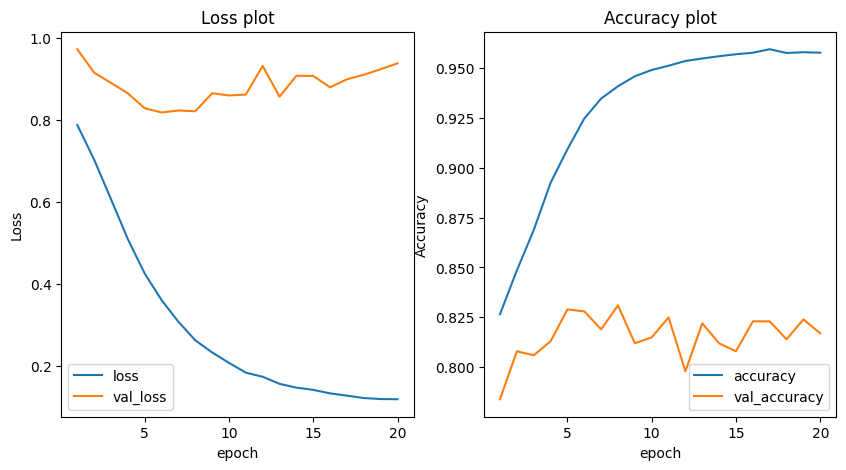

In [46]:
draw_loss_val_plot(history)

- 훈련과 검증 정확도(accuracy) 그래프

In [53]:
import keras

In [72]:
def modeling(epochs, model_check=None):
    model = models.Sequential()
    model.add(layers.Input(shape=(10000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46,activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

    if model_check is None:
        history = model.fit(X_train, y_train,epochs=epochs, batch_size=512,verbose=0,
                            validation_data=(X_val, y_val))
    else: 
        model_path = 'model/reuter_best_model.keras'
        check_pt = keras.callbacks.ModelCheckpoint(model_path)
        early_pt = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
        history = model.fit(X_train, y_train,epochs=epochs, batch_size=512, validation_data=(X_val, y_val),callbacks=[check_pt, early_pt])

    return model, history

-  다시 모델 훈련하기

In [73]:
def test_eval(epochs):
    print(f'## epoch = {epochs}')
    model, history = modeling(epochs)
    result = model.evaluate(test_X, test_y)
    print(f'test data loss = {result[0]:.4f}, accuracy={result[1]:.4f}\n')

### 5) 훈련된 모델로 새로운 데이터에 대해 예측하기

In [49]:
for ep in range(10,25,2):
    test_eval(ep)

## epoch = 10
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4776 - loss: 2.7646 - val_accuracy: 0.6030 - val_loss: 1.8606
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6708 - loss: 1.5694 - val_accuracy: 0.6860 - val_loss: 1.4058
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7473 - loss: 1.1917 - val_accuracy: 0.7330 - val_loss: 1.1937
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7980 - loss: 0.9655 - val_accuracy: 0.7660 - val_loss: 1.0854
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8312 - loss: 0.7954 - val_accuracy: 0.7930 - val_loss: 1.0080
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8606 - loss: 0.6627 - val_accuracy: 0.7970 - val_loss: 0.9631
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8850 - loss: 0.5451 - val_accuracy: 0.8040 - val_loss: 0.9198
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9055 - loss: 0.4570 - val_accura

In [59]:
model, history = modeling(20, model_check=True)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4931 - loss: 2.8105 - val_accuracy: 0.6120 - val_loss: 1.8911
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6666 - loss: 1.6160 - val_accuracy: 0.6910 - val_loss: 1.4541
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7344 - loss: 1.2475 - val_accuracy: 0.7360 - val_loss: 1.2313
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7828 - loss: 1.0248 - val_accuracy: 0.7630 - val_loss: 1.1155
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8145 - loss: 0.8572 - val_accuracy: 0.7880 - val_loss: 1.0377
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8433 - loss: 0.7157 - val_accuracy: 0.7970 - val_loss: 0.9732
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8697 - loss: 0.5986 - val_accuracy: 0.8080 - val_loss: 0.9260
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8939 - loss: 0.5000 - val_accuracy: 0.8110 - v

In [74]:
import os
print(os.path.exists('model/reuter_best_model.keras'))

False


In [76]:
model_path = 'model/reuter_best_model.keras'
bmodel = keras.models.load_model(model_path)
pred = bmodel.predict(test_X)

ValueError: File not found: filepath=model/reuter_best_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [63]:
np.max(pred[0])

NameError: name 'pred' is not defined

In [ ]:
# 테스트 데이터셋의 0번째 샘플에 대한 46개 토픽에 대한 예측확률값



In [ ]:
# 테스트 데이터셋의 0번째 샘플에 대한 46개 토픽에 대한 예측확률값 중 최대값


In [ ]:
# 테스트 데이터셋의 0번째 샘플에 대한 예측값


In [ ]:
# 테스트 데이터셋의 0번째 샘플에 대한 실제 레이블


### 레이블과 손실을 다루는 다른 방법

- 레이블 인코딩을 정수 텐서로 변환하여 사용할 경우 모델을 훈련할 때 loss를 'sparse_categirical_crossentropy'를 사용하면 됨

In [69]:
# 레이블을 정수 텐서로 변환
y_train = np.array(train_label)
y_train.shape


(8982,)

In [85]:
epochs=20
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, train_label[1000:], epochs=epochs, batch_size=512,verbose=0,
                        validation_data=(X_val, train_label[:1000]))

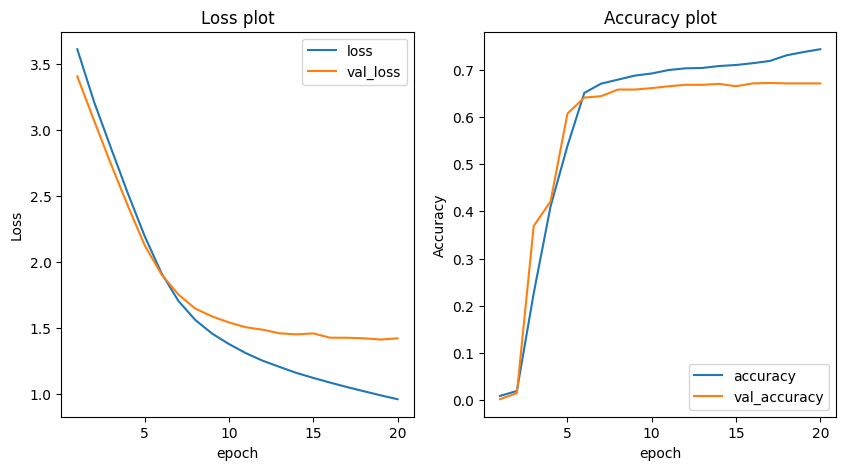

In [86]:
draw_loss_val_plot(history)

### 충분히 큰 중간층 사용 : 정보의 병목(bottleneck) 방지

1. 병목이 있는 모델: 중간층의 히든 유닛을 46개 보다 적개 구성한 경우

## [연습]
1. 더 크거나 작은 층을 사용하여 모델 훈련하고 검증과 테스트 정확도 비교해보기
  - 32개 유닛, 64개 유닛 등

2. 은닉층을 1개 또는 3개로 사용하여 비교해보기 

## [정리]

- N개 클래스로 분류하는 경우 네트워크의 마지막 Dense 층의 크기는 N이어야 함

- 단일레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화함수를 사용함

- 단일레이블, 다중 분류 문제에서 손실함수는 항상 범주형 crossentropy를 사용해야 함

- 다중 분류에서 레이블을 다루는 방법
  1. 레이블을 범주형 인코딩(또는 원핫인코딩)을 사용하고, categorical_crossentropy 손실함수를 사용
  2. 레이블을 정수로 인코딩하고, sparse_categorical_crossentropy 손실함수를 사용

- 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 함